In [1]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

sstyle = "seaborn-poster"
plt.style.use(sstyle)
plt.rc('font',family = 'serif')

savefig = False

#%matplotlib notebook

In [2]:
def read_data(path,name):
    df = pd.read_csv(path+name, encoding="latin1")
    beta_min = float(df["XR01"][2].split(' ')[0])
    beta_max = float(df["XR01"][2].split(' ')[1])
    dbeta = float(df["XR01"][2].split(' ')[3])
    beta = np.linspace(beta_min,beta_max,int((beta_max-beta_min)/dbeta)+1)
    R = df["XR01"][13:13+len(beta)].str.replace("\t","").astype(float).values
    return (beta,R)

In [3]:
beta_LiF,R_LiF   = read_data("","LiF_sweep_def.xry")
beta_NaCl,R_NaCl = read_data("","NaCl_sweep_def.xry")

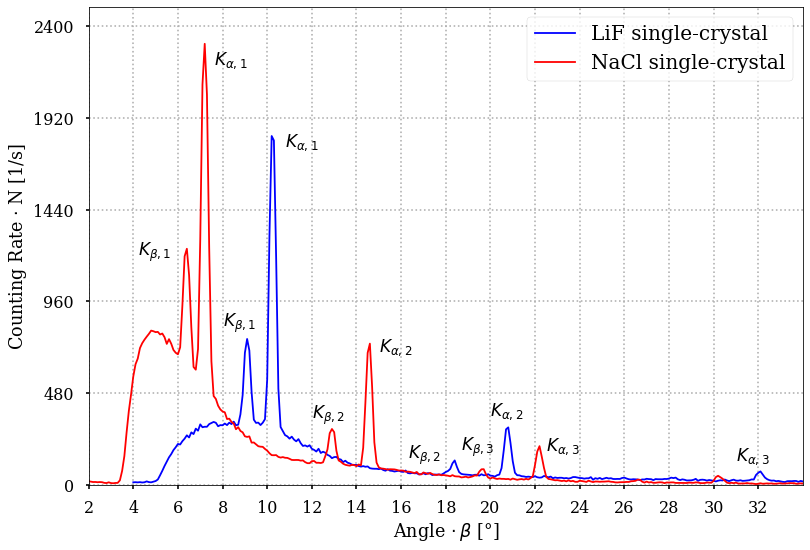

In [4]:
plt.plot(beta_LiF,R_LiF, label = "LiF single-crystal", color="blue", lw = 1.8)
plt.plot(beta_NaCl,R_NaCl, label = "NaCl single-crystal", color = "red", lw = 1.8)

# NaCl Tags
plt.text(7.6,2200, "$K_{\\alpha,1}$", fontsize=17)
plt.text(4.2,1200, "$K_{\\beta,1}$", fontsize=17)

plt.text(15,700, "$K_{\\alpha,2}$", fontsize=17)
plt.text(12,350, "$K_{\\beta,2}$", fontsize=17)

plt.text(22.5,180, "$K_{\\alpha,3}$", fontsize=17)
plt.text(18.7,180, "$K_{\\beta,3}$", fontsize=17)

# LiF Tags
plt.text(10.8,1770, "$K_{\\alpha,1}$", fontsize=17)
plt.text(8.0,830, "$K_{\\beta,1}$", fontsize=17)

plt.text(20,365, "$K_{\\alpha,2}$", fontsize=17)
plt.text(16.3,140, "$K_{\\beta,2}$", fontsize=17)

plt.text(31,130, "$K_{\\alpha,3}$", fontsize=17)

plt.xlabel("Angle $\\cdot\:\\beta $ [°]")
plt.ylabel("Counting Rate $\\cdot$ N [1/s]")
plt.legend(fontsize=20)

plt.xlim([2, 34])
plt.xticks(np.arange(2, 34, 2))
plt.ylim([0, 2.5e3])
plt.yticks(np.arange(0, 2.5e3, 480))

plt.grid(which="both", ls=":")

if savefig == True:
    plt.savefig('line_plot.pdf')

plt.show()

In [5]:
Kα, Kβ = 71.08, 63.09
nλ = [63.09, 71.08, 126.18, 142.16, 189.27,213.24]

In [6]:
# LiF
θ_LiF = np.array([9.1,  10.24, 18.35, 20.76, 32.09])
σ_Lif = np.array([0.13, 0.12,  0.14,  0.14,  0.13])

In [7]:
# NaCl
θ_NaCl = np.array([6.38,7.20,12.9,14.56,19.62,22.18])
σ_NaCl = np.array([0.12,0.13,0.14,0.13, 0.14, 0.14])

In [8]:
# Calculation of Lattice parameter and uncertainty given the characteristic peak and material
uncertainty = 0.1
def lattice_param(index,material):
    if material == "nacl":
        θ = θ_NaCl.copy()
        nλ__ = nλ
    elif material == "lif":
        θ = θ_LiF.copy()
        nλ__ = nλ[:-2:]+[nλ[-1]]
    val_p = nλ__[index]/np.sin(np.radians(θ[index] + uncertainty))
    val_m = nλ__[index]/np.sin(np.radians(θ[index] - uncertainty))
    theo  = nλ__[index]/np.sin(np.radians(θ[index]))
    uncer =  max(abs(theo-val_p),abs(theo-val_m))
    return (theo, uncer)